In [19]:
import numpy as np
import scipy.sparse.linalg as sp_lg
import scipy.sparse as sp
import numpy.linalg as lg
import matplotlib.pyplot as plt

EI = 2 * 10 ** 11 * (1/12) * 0.04 * 0.2 ** 3
L = 10
s = 2
xleft = 0.0
xright = L
yleft = 0.0
yright = 0.0

In [20]:
def A(h, N): 
    d0 = np.ones(N)
    d1 = np.ones(N-1)
    d2 = np.ones(N-2)
    A = (6*np.diag(d0,0) + -4*np.diag(d1,-1) + -4*np.diag(d1,1) + 1*np.diag(d2,-2) + 1*np.diag(d2,2))
    A[0,0] = 5
    A[N-1,N-1] = 5
    return A * EI/(h ** 4)

def b(h,N,x,yleft,yright):
    result = 611.52*np.ones(N)
    if(((L/2-s/2)/h).is_integer() == True):
        for i in range(int((L/2-s/2)/h),int((L/2+s/2)/h)):
            result[i] = result[i] + 2450.0
    return result 

def solve(h,N,x,yleft,yright):
    AA = A(h,N)
    bb = b(h,N,x,yleft,yright)
    y = lg.solve(AA,bb)
    result = np.concatenate(([yleft],y,[yright]))
    return result

def main(N):
    h = (xright  - xleft)/(N+1)
    print("Stepsize (h): {:.2f}".format(h))
    x = np.linspace(xleft,xright,N+2)                                 
    y = solve(h,N,x,yleft,yright)
    return x,y

def plot(x,y):
    plt.figure("Boundary value problem")
    plt.plot(x,y,"k")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("De graph of the function y")
    plt.legend("y", loc="best")
    plt.gca().invert_yaxis()
    plt.show()
    
def table(x,y,N):    
    print ("{:>4}{:>11}{:>21}".format("k", "x_k", "y(x_k)"))
    for k in range(0, N+2):
        print ("{:4.0f}{:11.2f}{:23.7e}".format(k, x[k], y[k]))

# Assignment 2.11


In [21]:
N = 9
x,y = main(N)
#plot(x,y)
table(x,y,len(y)-2)

Stepsize (h): 1.00
   k        x_k               y(x_k)
   0       0.00          0.0000000e+00
   1       1.00          1.0173319e-02
   2       2.00          1.9417230e-02
   3       3.00          2.6916986e-02
   4       4.00          3.1972500e-02
   5       5.00          3.3998344e-02
   6       6.00          3.2523750e-02
   7       7.00          2.7651986e-02
   8       8.00          2.0060355e-02
   9       9.00          1.0540819e-02
  10      10.00          0.0000000e+00


Stepsize (h): 0.05


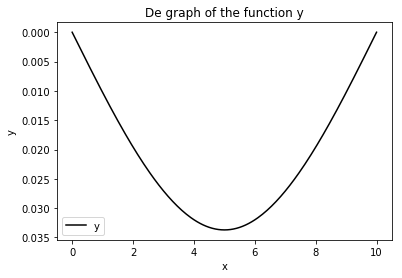

In [18]:
N = 199
x,y = main(N)
plot(x,y)
#table(x,y,len(y)-2)

In [10]:
print((0.90/0.05).is_integer())

True


In [11]:
/3pri1

SyntaxError: invalid syntax (<ipython-input-11-6fcd428c742f>, line 1)